# Lesson ✍️.2 - Simpson's Paradox

Guides: Ravi and Niharika 

<img src="simpsonshowchart.png" style="width: 400px;"/>

<b> Goal: </b> Understand Simpson's Paradox and its impact on data analytics. 

# Motivating Example: US Elections 🇺🇸 

[Rich State, Poor State, Red State, Blue State](https://docs.google.com/spreadsheets/d/1PNCr4Q1SWYvC_BuliivMSZZClbTai_s_R5SOoXdKSz4/edit#gid=0)

### What is Simpson's Paradox?

>Also known as the <b>Yule-Simpson effect</b>, this is a simple mathematical trick in which weighted averages can misrepresent relationships between groups of data. Specifically, it is a phenomenon in which a trend appears in several different groups of data but <b> disappears or reverses </b> when these groups are combined.

<p float="left">
    <img src="agg.png" width ="400" align="left" />
    <img src="subgroups.png" width ="400" />
</p>

### Let's Look at an Example - UC Berkeley Grad School Admissions

A classic example of thus is from 1973 where UC Berkeley 🐻 Admissions was sued for bias against women applying to grad school.  Data showed that 44% of men were
admitted whereas only 30% of women were admitted. Since admission is decided by departments, the University decided to investigate which departments were ”discriminating” against women.

However, when examining the individual departments, it appeared that six out of 85 departments were significantly biased against men, whereas four were significantly biased against women. In fact, the pooled and corrected data showed a "small but statistically significant bias in favor of women". 

<img src="admissionschart.png" style="width: 400px;"/>

A research paper by Bickel et al concluded that women tended to apply to more competitive departments with low rates of admission even among qualified applicants (such as in the English Department), whereas men tended to apply to less competitive departments with high rates of admission among the qualified applicants (such as in engineering and chemistry).

#### What can we learn from this?

- Too much aggregation can become irrelevant 
- Important to stratify data into subpopulations (departments in the case above)
- It reminds us significantly of critical thinking when dealing with data as well looking for hidden biases and variables present in the data especially when we don't know the data collection processes
- Domain knowledge is key!

<b> TLDR: </b> Simpson’s paradox can be avoided with the help of reviewing frequency tables and correlations along with a thorough understanding of the business problem being studied.

##### Let's look at another example! 

# Simpson’s Paradox in Covid-19 Case Fatality Rates

The next few code cells import libraries, class for datasets as well as data sets & plotting functions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [2]:
class Covid19Dataset():
    """A class for datasets with case and fatality numbers stratified by age 
    group for different countries.
    """
    def __init__(self,
                country,
                date,
                confirmed_cases,
                fatalities,
                source,
                comments=None,
                age_ranges=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
                            '60-69', '70-79','80+']
                ):
        self.country = country
        self.date = date
        self.confirmed_cases = np.array(confirmed_cases)
        self.fatalities = np.array(fatalities)
        self.source = source
        self.comments = comments
        self.age_ranges = age_ranges

    def compute_stats(self):
        self.cfr = self.fatalities/ self.confirmed_cases
        self.total_cases = sum(self.confirmed_cases)
        self.case_rates_by_age = self.confirmed_cases/self.total_cases
        self.total_cfr = sum(self.case_rates_by_age * self.cfr)

In [3]:
def autolabel(rects, ax, decimal_points=1):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # Thanks to Ehud Karavani for fixing the annotation for negative numbers
        text_offset = (0, 3) if height >= 0 else (-2, -13)
        ax.annotate(f"{height:.{decimal_points}f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=text_offset,
                    textcoords="offset points",
                    ha='center', va='bottom')

def bar_chart_by_age(datasets, type):
    try:
        n_data = len(datasets)
        labels = datasets[0].age_ranges
    except TypeError:
        print("Error: please provide a valid Covid19Dataset.")
    
    x = 1.25 * np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots()
    ax.set_xlabel('Age')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    i = 0
    for data in datasets:
        data_id  = data.country + ', ' + data.date
        if type == 'cases_by_age':
            ax.set_ylabel('%')
            ax.set_title('Proportion of confirmed cases by age group')
            y = 100 * data.case_rates_by_age
            bar = ax.bar(x - 1/2 + i/n_data, y, 1/n_data, label=data_id)
    
        elif type == 'cfr':
            ax.set_ylabel('%')
            ax.set_title('Case fatality rates (CFRs) by age group')
            y = 100 * data.cfr
            bar = ax.bar(x - 1/2+ i/n_data, y, 1/n_data, label=data_id)
        
        i += 1
        # autolabel(bar, ax)

    ax.legend()
    fig.tight_layout()
    plt.show()
    return fig

In [4]:
Italy_data = Covid19Dataset(
    country = 'Italy',
    date = '9 March', 
    confirmed_cases = [43, 85, 296, 470, 891, 1453, 1471, 1785, 1532],
    fatalities = [0, 0, 0, 0, 1, 3, 37, 114, 202],
    source = {
        'type': 'official report',
        'date': '9 March 2020, 4pm',
        'author': 'Istituto Superiore di Sanità \
            (ISS, Italian National Institute of Health)',
        'url': 'https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-\sorveglianza-integrata-COVID-19_09-marzo-2020.pdf'
        },
)

In [5]:
China_data = Covid19Dataset(
    country = 'China',
    date = '17 February', 
    confirmed_cases = [416, 549, 3619, 7600, 8571, 10008, 8583, 3918, 1408],
    fatalities = [0, 1, 7, 18, 38, 130, 309, 312, 208],
    source = {
        'type': 'scientific publication',
        'title': 'Characteristics of and important lessons from the coronavirus\
            disease 2019 (COVID-19) outbreak in China: summary of a report of\
            72 314 cases from the Chinese Center for Disease Control and Prevention',
        'author': 'Wu, Zunyou and McGoogan, Jennifer M',
        'journal': 'Jama',
        'date': '24 February 2020',
        'url': 'https://jamanetwork.com/journals/jama/fullarticle/2762130'
        },
)

When comparing case fatality rates (CFRs) of COVID-19 for different age groups (i.e., the proportion of confirmed cases within that age group which ended deadly) reported by the Chinese Center for Disease Control and Prevention (CCDCP) with preliminary CFRs in Italy as reported by the Italian National Institute of Health (ISS, for Istituto Superiore di Sanità), a seemingly strange phenomenon can be observed:

> - for any given age group, the CFR in Italy was lower than that in China;
> - overall, the CFR in Italy (4.3%) was higher than that in China (2.3%).

In [6]:
datasets = [China_data, Italy_data]
for data in datasets:
    data.compute_stats()

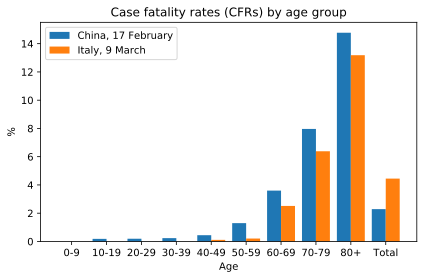

In [7]:
labels = China_data.age_ranges + ['Total']
x = 1.25*np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
ax.set_xlabel('Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('%')
ax.set_title('Case fatality rates (CFRs) by age group')
w = 0.5

China_id = China_data.country + ', ' + China_data.date
China_data = np.append(100*China_data.cfr, 100*China_data.total_cfr)
ax.bar(x - w/2, China_data, w, label=China_id)

Italy_id = Italy_data.country + ', ' + Italy_data.date
Italy_data = np.append(100*Italy_data.cfr, 100*Italy_data.total_cfr)
ax.bar(x + w/2, Italy_data, w, label=Italy_id)

ax.legend()
fig.tight_layout()
plt.show()
fig.savefig('Simpson.pdf', transparent=True, bbox_inches='tight')

### How might this happen?

This looks like a classic example of Simpson's paradox, which refers to the observation that aggregating data across subpopulations may lead to opposite conclusions from considering the different subpopulations separately.

The distribution of cases across age groups differs significantly between the two countries, i.e. there is a statistical association between country and the number of confirmed cases per age group. The proportion of cases in any given age range is not reflected in the CFRs plotted above, thus leading to this counterintuitive behavior.

##### ...what happens when we look at proportions of cases?

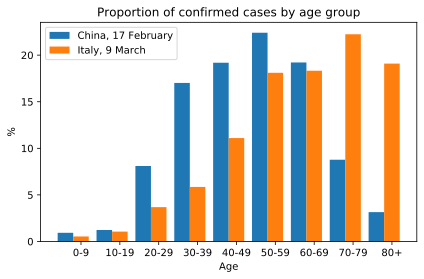

In [8]:
fig = bar_chart_by_age(datasets, 'cases_by_age')
fig.savefig('CaseDemographic.pdf', transparent=True, bbox_inches='tight')

Again, this is because we are looking at relative frequencies and ratios which
correspond to the conditional probabilities of fatality given a case from a particular age group and
country. However, such percentages conceal the absolute numbers of cases within each age group.

Considering these absolute numbers sheds light on how the phenomenon can arise: the distribution
of cases across age groups differs significantly between the two countries, i.e., there is a statistical
association between the country of reporting and the proportion of confirmed cases per age group.
In particular, Italy recorded a much higher proportion of confirmed cases in older patients compared
to China.

### Appendix

[Paper - How to Detect the Simpson's Paradox](https://aaai.org/ocs/index.php/FLAIRS/FLAIRS18/paper/view/17641/16887)

[Code to Detect Simpson's Paradox](https://github.com/CamDavidsonPilon/simpsons-paradox/blob/master/detect_paradox.py)
